### S&P Sector Performance

In [1]:
import pandas as pd
import numpy as np
import risk_kit as rk
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ticker = ['^GSPC','^GSPE','^SP500-15','^SP500-20','^SP500-25','^SP500-30',
          '^SP500-35','^SP500-40','^SP500-45','^SP500-50','^SP500-55','^SP500-60']
names = ['S&P500','Energy','Materials','Industrials','ConsumerDiscretionary','ConsumerStaples',
         'HealthCare','Financials','InformationTechnology','CommunicationServices','Utilities','RealEstate']
data = rk.get_data(ticker,period='10y')
price = data.Close.set_axis(names, axis=1).dropna()

In [3]:
price_100 = price/price.loc[price.index[0]] * 100

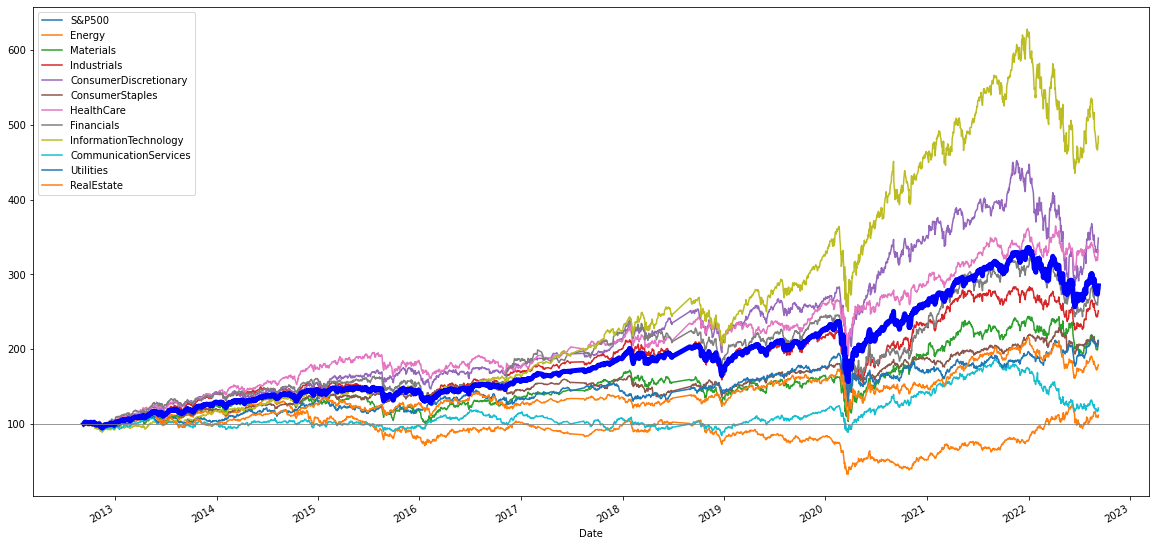

In [4]:
price_100.plot(figsize=(20,10))
price_100['S&P500'].plot(figsize=(20,10),lw=5,c='b')
plt.axhline(y=100, color='grey', linewidth=0.8)

In [5]:
(price_100.tail(1).T-100).round(2)

Date,2022-09-09
S&P500,184.61
Energy,11.74
Materials,109.43
Industrials,151.35
ConsumerDiscretionary,248.49
ConsumerStaples,108.81
HealthCare,232.48
Financials,171.04
InformationTechnology,384.53
CommunicationServices,21.39


In [6]:
rets = price.pct_change().dropna()
corr = rets.corr()

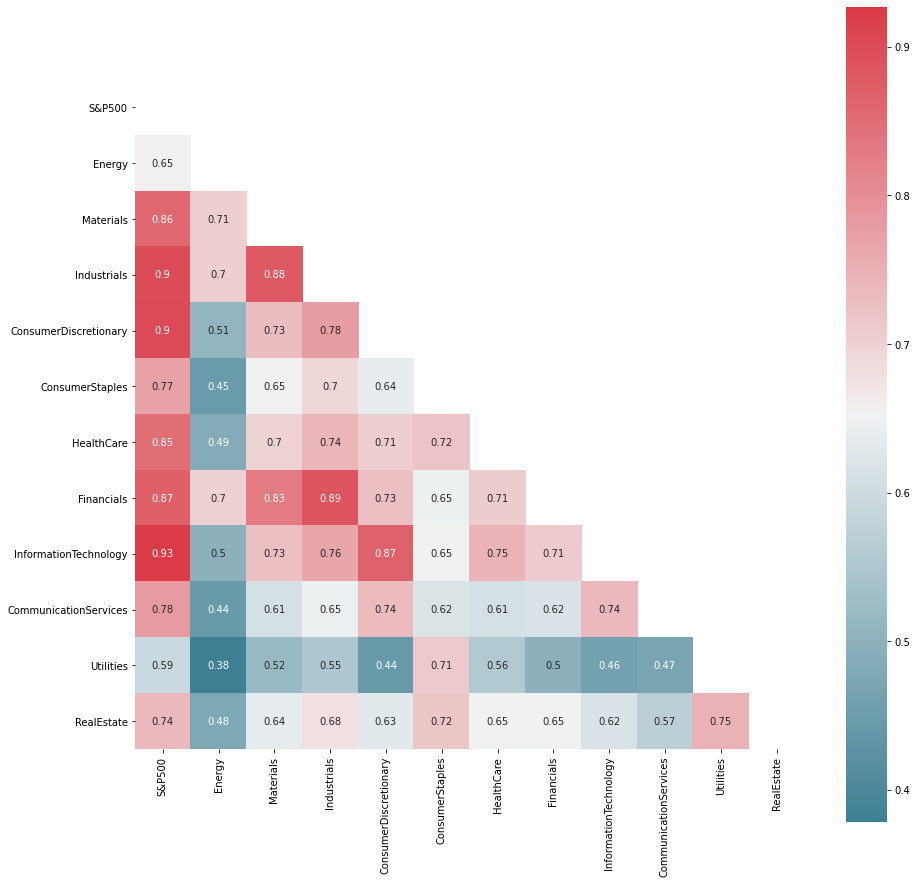

In [7]:
f, ax = plt.subplots(figsize=(15, 15))
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
corr
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True,)

In [8]:
SMA200 = price.rolling(200).mean()
SMA50 = price.rolling(50).mean()

In [9]:
start = '2019-01-01'
end = '2022-02-22'

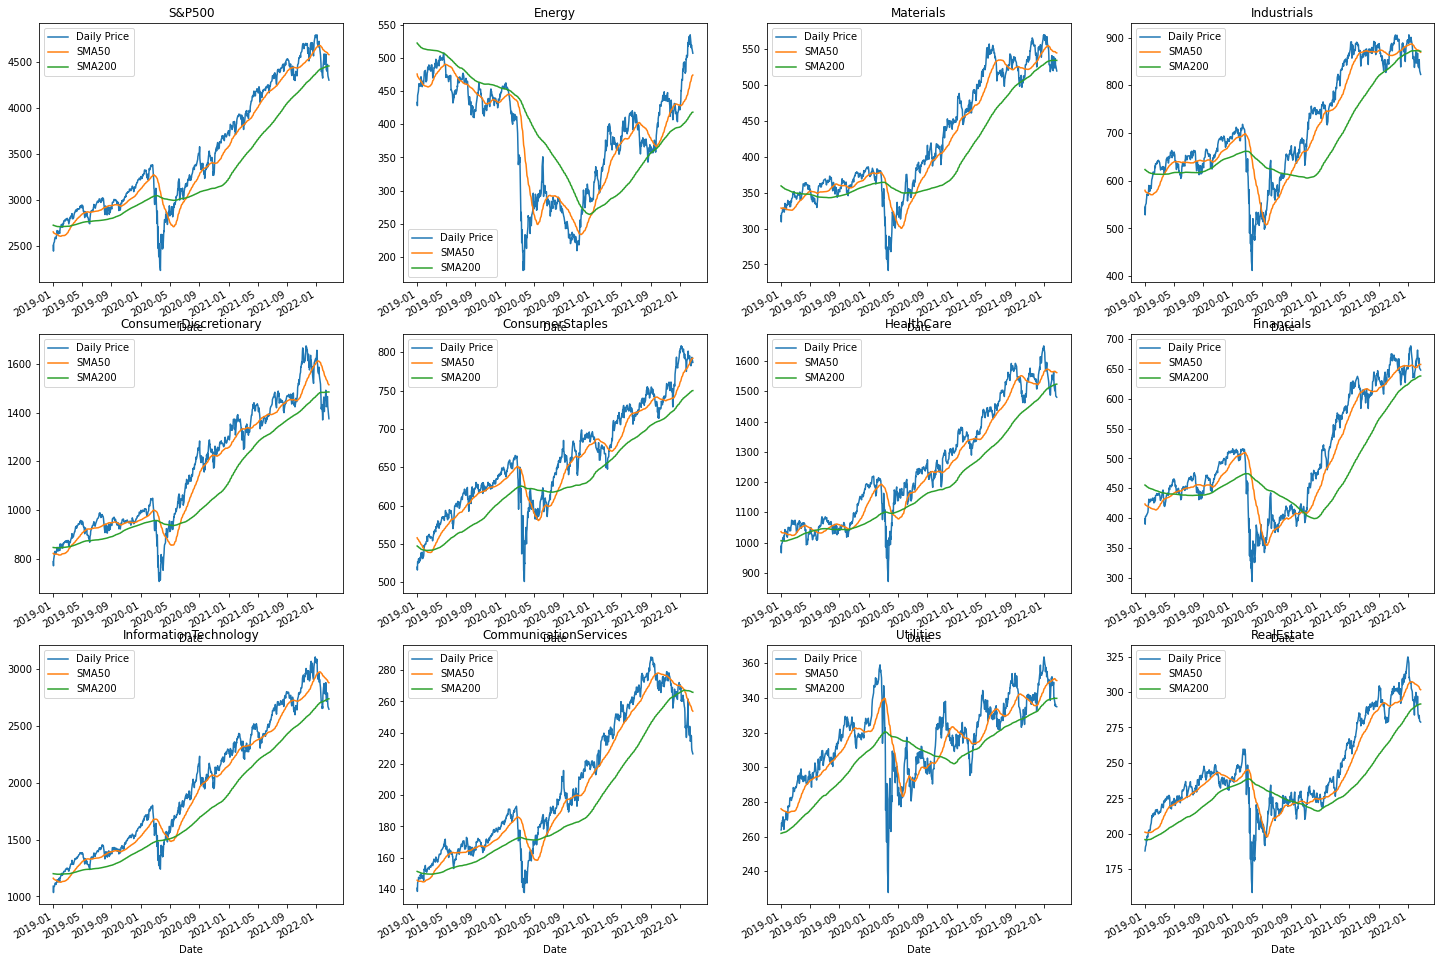

In [10]:
i = 1
plt.figure(figsize=(25,18))

for name in names:
    plt.subplot(3,4,i)
    plt.subplots_adjust(bottom=0.1)
    price[name][start:end].plot()
    SMA50[name][start:end].plot()
    SMA200[name][start:end].plot()
    plt.title(name)
    plt.legend(['Daily Price','SMA50','SMA200'])
    
    i += 1

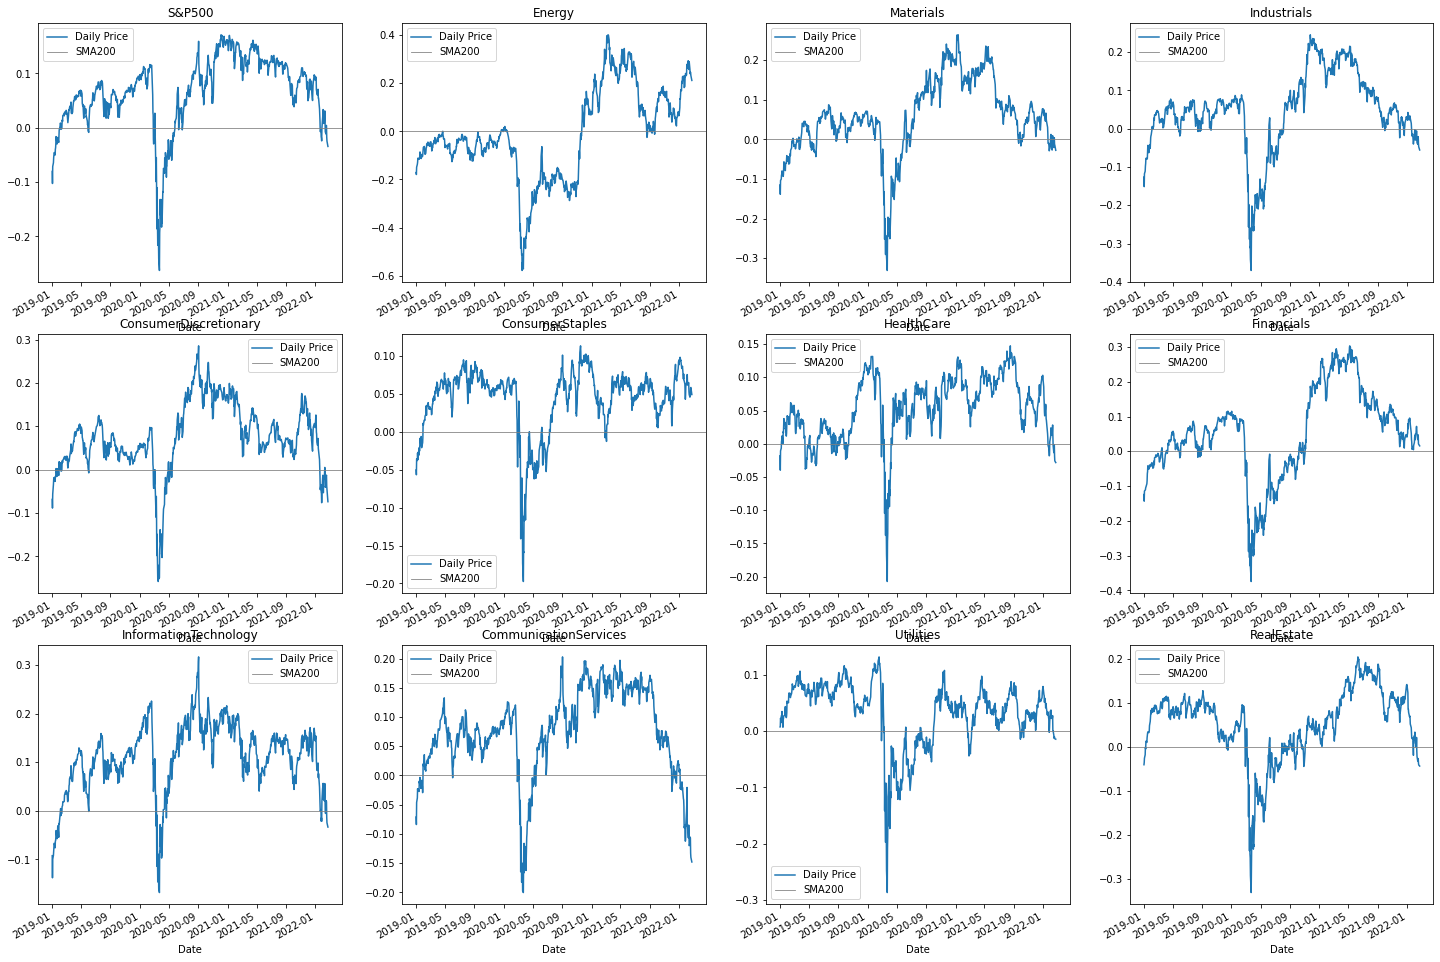

In [11]:
momentum = (price/SMA200)-1
i = 1
plt.figure(figsize=(25,18))

for name in names:
    plt.subplot(3,4,i)
    momentum[name][start:end].plot()
    plt.axhline(y=0,c='grey', linewidth=0.8)
    plt.title(name)
    plt.legend(['Daily Price','SMA200'])
    i += 1